# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
#Three observations that can be made from reviewing the figures and tables are 
#1.) The distribution of male and female mice is essentially equal amongst the drug study
#2.) The mouse m957 had a tumor size that decreased with time as it was treated with Capomulin
#3.) Capomulin & Ramicane had more timepoints for study data than Propriva. 
#3a.)Also, placebo seemed to be in line with most treatments, therefore the efficacy of the treatments could be questioned. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mstudy_combined = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mstudy_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = mstudy_combined['Mouse ID'].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_df = mstudy_combined.groupby(['Mouse ID','Timepoint']) #by both
duplicate_mice = pd.DataFrame(duplicate_mice_df['Mouse ID'].count().sort_values(ascending = False))
duplicate_mice

Mouse ID
Mouse ID Timepoint          
g989     20                2
         15                2
         10                2
         5                 2
         0                 2
...                      ...
i334     20                1
         15                1
         10                1
         5                 1
z969     45                1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mstudy_combined[mstudy_combined["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate = mstudy_combined[mstudy_combined["Mouse ID"].isin(["g989"])==False]
drop_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mid = drop_duplicate['Mouse ID'].nunique()
clean_mid

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = mstudy_combined.groupby("Drug Regimen")
mean_tumor_volume = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std_err = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                                     "Median Tumor Volume": median_tumor_volume,
                                     "Tumor Volume Variance": tumor_volume_variance,
                                     "Tumor Volume Std. Dev.": tumor_volume_std_dev,
                                     "Tumor Volume Std. Err.": tumor_volume_std_err})
drug_regimen_summary.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#drug_regimen = mstudy_combined.groupby("Drug Regimen")
#tumor_volume_summary = mstudy_combined("Drug Regimen")["Tumor Volume (mm3)"].agg('mean', 'median', 'var', 'std', 'sem')
summary_statistics = mstudy_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(mean='mean', median='median', variance='var', standard_deviation='std', SEM=lambda x: x.std()/(len(x)**0.5)).reset_index()
print(summary_statistics)

  Drug Regimen       mean     median   variance  standard_deviation       SEM
0    Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
1     Ceftamin  52.591172  51.776157  39.290177            6.268188  0.469821
2    Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
3     Ketapril  55.235638  53.698743  68.553577            8.279709  0.603860
4     Naftisol  54.331565  52.509285  66.173479            8.134708  0.596466
5      Placebo  54.033581  52.288934  61.168083            7.821003  0.581331
6     Propriva  52.322552  50.854632  42.351070            6.507770  0.512884
7     Ramicane  40.216745  40.673236  23.486704            4.846308  0.320955
8     Stelasyn  54.233149  52.431737  59.450562            7.710419  0.573111
9    Zoniferol  53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

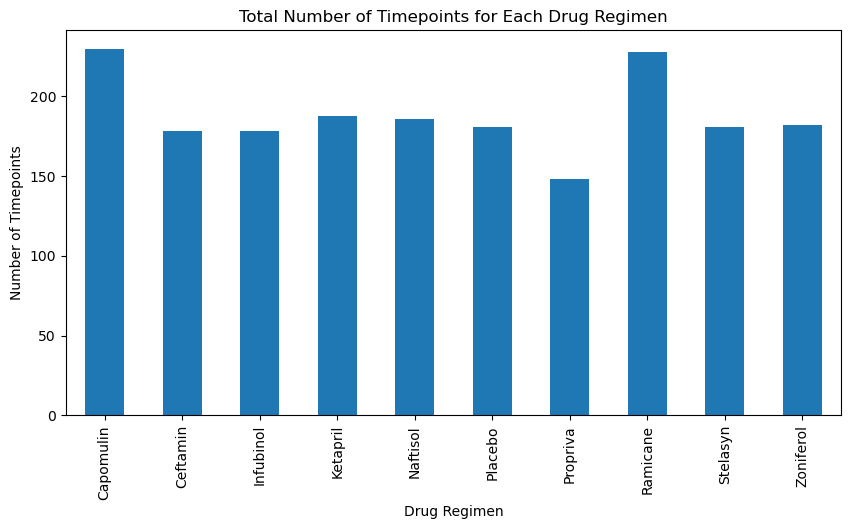

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = drop_duplicate.groupby('Drug Regimen').size()
drug_regimen_counts.plot(kind='bar', figsize=(10,5), title='Total Number of Timepoints for Each Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints')
plt.show()

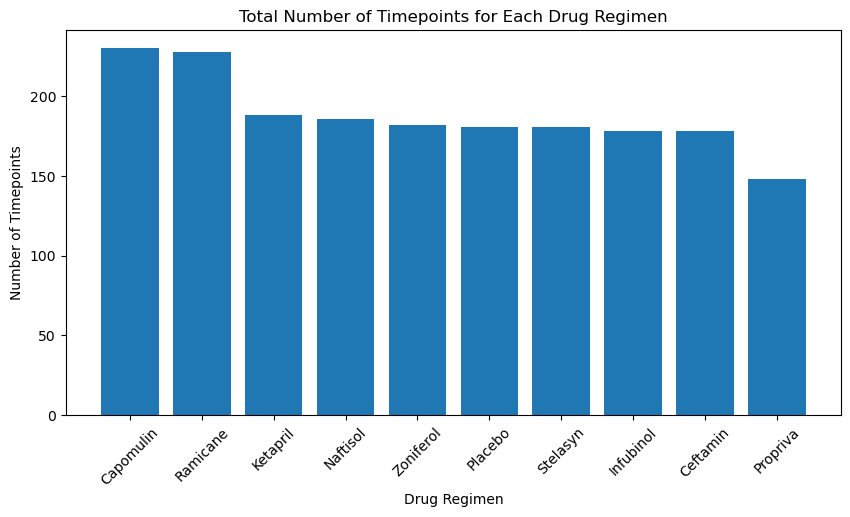

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts_pyplot = drop_duplicate['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(drug_regimen_counts_pyplot.index, drug_regimen_counts_pyplot.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xticks(rotation=45)
plt.show()

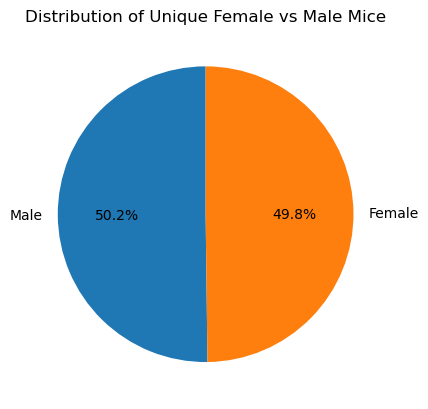

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
unique_mice = mstudy_combined[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')  # Hide the y-label
plt.show()


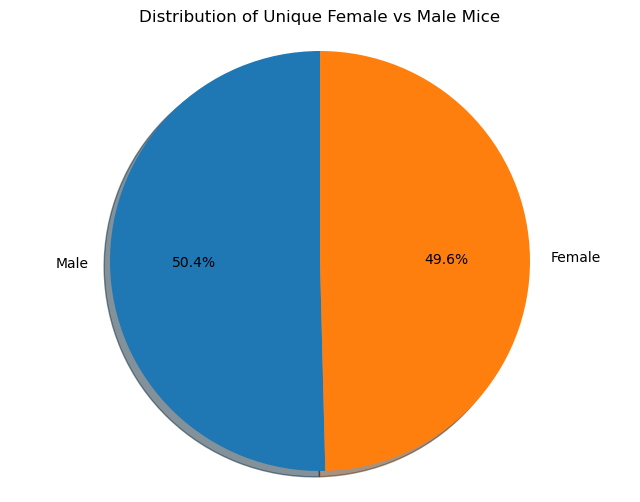

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
unique_mice = drop_duplicate[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = drop_duplicate.groupby("Mouse ID").agg({"Timepoint": "max"}).reset_index()
merged_df = last_timepoint_df.merge(drop_duplicate, on=["Mouse ID", "Timepoint"])
final_tumor_volumes = merged_df[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

last_timepoint_df = drop_duplicate.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_df = pd.merge(last_timepoint_df, drop_duplicate, on=['Mouse ID', 'Timepoint'])
final_tumor_volumes = merged_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
print(final_tumor_volumes)

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


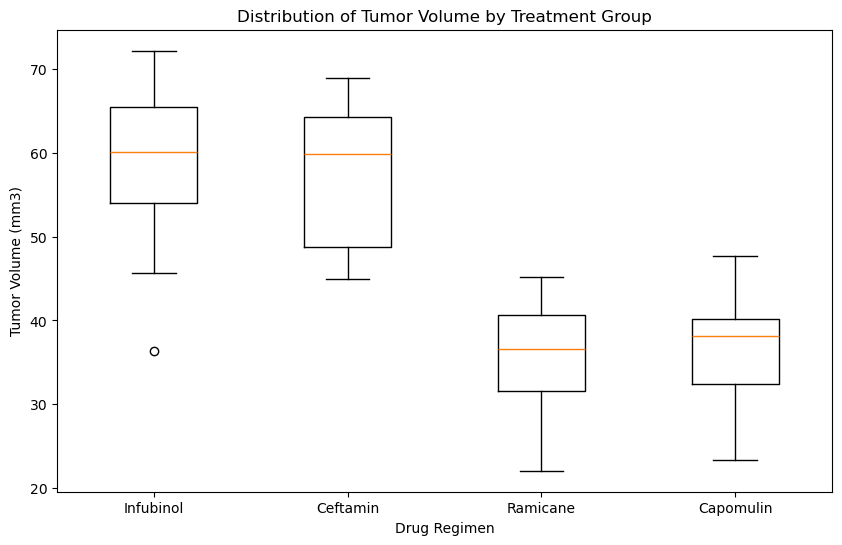

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in final_tumor_volumes['Drug Regimen'].unique()],
            labels=final_tumor_volumes['Drug Regimen'].unique())

# Step 2: Customize the plot
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Step 3: Show the plot
plt.show()

## Line and Scatter Plots

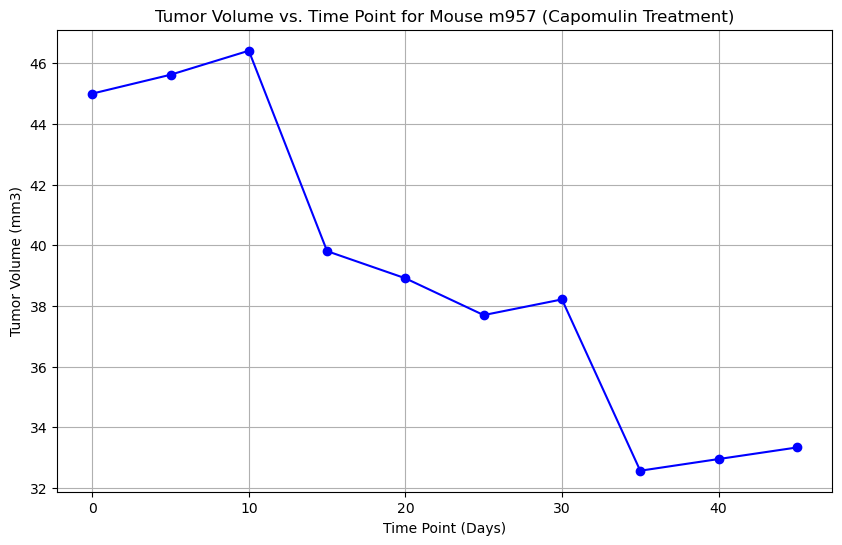

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'm957'  # Replace with the ID of the mouse you want to plot
mouse_data = drop_duplicate[(drop_duplicate['Mouse ID'] == mouse_id) & (drop_duplicate['Drug Regimen'] == 'Capomulin')]

# Step 2: Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Step 3: Customize the plot
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

# Step 4: Show the plot
plt.show()

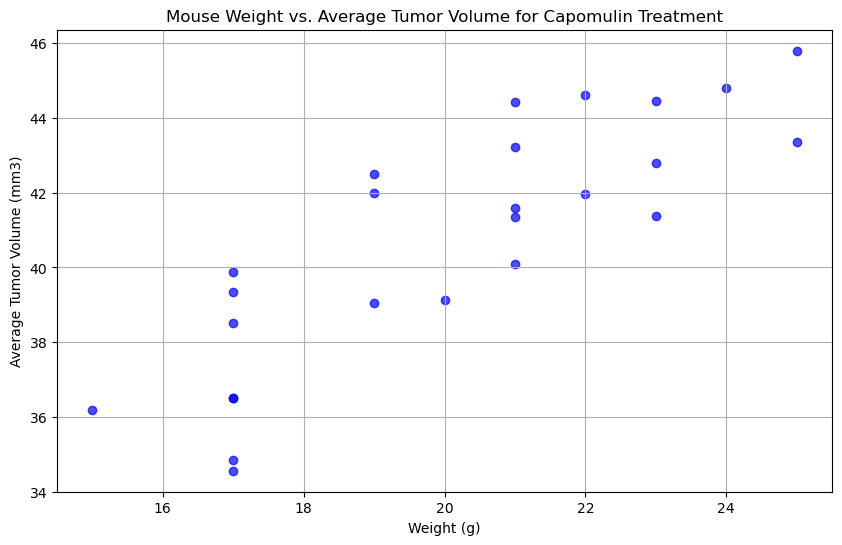

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = drop_duplicate[drop_duplicate['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', alpha=0.7)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694722


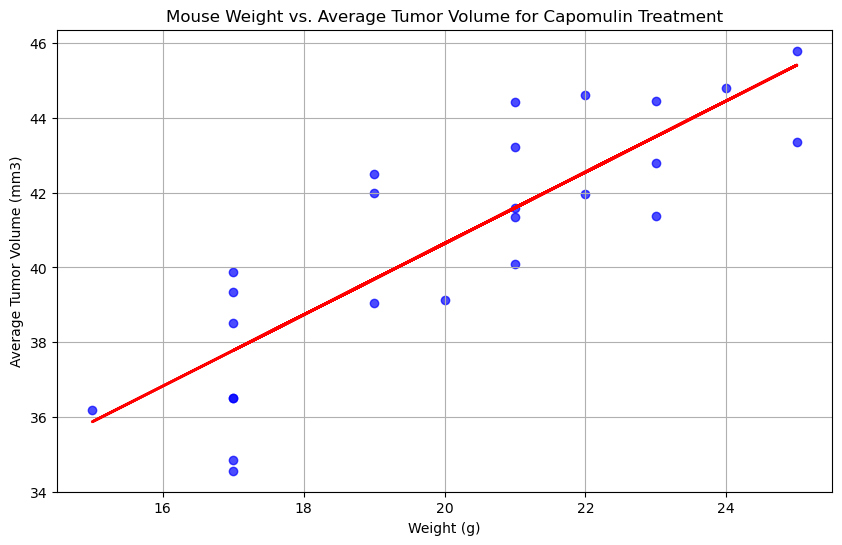

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from sklearn.linear_model import LinearRegression
capomulin_data = drop_duplicate[drop_duplicate['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'}).reset_index()
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f'Correlation coefficient between mouse weight and average tumor volume: {correlation}')

#linear regression
X = average_tumor_volume['Weight (g)'].values.reshape(-1, 1)  # Feature
y = average_tumor_volume['Tumor Volume (mm3)'].values  # Target
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='b', alpha=0.7)
plt.plot(average_tumor_volume['Weight (g)'], model.predict(X), color='r', linewidth=2)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid()
plt.show()